In [1]:
# EDA

PATH = 'Data/'

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(PATH + 'FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df['SP_Vol'] = np.log(df['SP_close'] / df['SP_close'].shift(1)).rolling(window=14).std().shift(-14)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SP_Vol
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,0.011162
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,0.010928
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,0.010160
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,0.007279
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,0.007275
5,2011-12-22,156.350006,156.800003,155.330002,156.039993,156.039993,9888400,124.629997,125.400002,124.230003,...,52.400002,49.656178,13179600,38.270000,38.549999,38.209999,38.279999,38.279999,5376800,0.007377
6,2011-12-23,156.350006,156.490005,155.820007,156.309998,156.309998,3565100,125.669998,126.430000,125.410004,...,52.790001,50.169365,4729000,38.470001,38.610001,38.369999,38.490002,38.490002,2162200,0.007134
7,2011-12-27,155.080002,155.550003,154.539993,154.910004,154.910004,4918600,126.169998,126.820000,126.059998,...,51.869999,49.295036,4786400,38.490002,39.209999,38.459999,39.060001,39.060001,7834100,0.007549
8,2011-12-28,154.050003,154.259995,150.660004,151.029999,151.029999,16436100,126.510002,126.529999,124.730003,...,50.060001,47.574883,14170400,38.880001,38.889999,38.189999,38.340000,38.340000,5654300,0.006088
9,2011-12-29,149.089996,150.720001,148.270004,150.339996,150.339996,19812200,125.239998,126.250000,124.860001,...,51.200001,48.658298,12196600,38.389999,38.459999,37.869999,38.410000,38.410000,8924300,0.005787


In [4]:
# select features
df.head().style.background_gradient(cmap='Reds')

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SP_Vol
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.290040,11967.839840,11825.219730,11868.809570,11868.809570,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.301800,1.298200,1.305100,1.295700,1,105.090000,104.880000,106.500000,104.880000,14330,1,93.420000,94.910000,96.000000,93.330000,0,53604,54248,54248,52316,119440,1,1.911000,1.911000,1.911000,1.911000,1,1414.650000,1420.300000,1423.350000,1376.850000,0,618.850000,614.700000,615.000000,614.600000,1,1425,80.341000,80.565000,80.630000,80.130000,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,0.011162
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.250000,11968.179690,11819.309570,11866.389650,11866.389650,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.303500,1.302000,1.308700,1.299700,1,103.350000,103.510000,104.560000,102.460000,140080,0,93.790000,93.430000,94.800000,92.530000,1,53458,53650,54030,52890,65390,0,1.851000,1.851000,1.851000,1.851000,0,1420.250000,1414.750000,1431.750000,1400.700000,1,623.650000,622.600000,623.450000,622.300000,1,1400,80.249000,80.175000,80.395000,79.935000,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,0.010928
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.540040,11925.879880,11735.190430,11766.259770,11766.259770,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.299500,1.304300,1.304400,1.298100,0,103.640000,103.630000,104.570000,102.370000,147880,1,94.090000,93.770000,94.430000,92.550000,1,52961,53400,53400,52544,67280,0,1.810000,1.810000,1.810000,1.810000,0,1411.100000,1422.650000,1427.600000,1404.600000,0,608.800000,626.000000,630.000000,608.600000,0,1400,80.207000,80.300000,80.470000,80.125000,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,0.010160
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.209960,12117.129880,11768.830080,12103.580080,12103.580080,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.307900,1.300300,1.313300,1.299400,1,106.730000,104.300000,107.270000,103.910000,170240,1,95.550000,96.390000,99.700000,96.390000,1,53487,52795,53575,52595,55130,1,1.927000,1.927000,1.927000,1.927000,1,1434.750000,1408.950000,1436.550000,1408.150000,1,626.650000,622.450000,622.450000,622.450000,1,1400,80.273000,80.890000,80.940000,80.035000,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,0.007279
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.580080,12119.700200,11999.440430,12107.740230,12107.740230,163250000,67.099998,69.400002,66.900002,68.500000,66.18072

In [5]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
                 ..
USO_Low           0
USO_Close         0
USO_Adj Close     0
USO_Volume        0
SP_Vol           14
Length: 82, dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
SP_Vol           0
Length: 82, dtype: int64

C:\Users\Henry\AppData\Local\Temp\ipykernel_35076\1977475870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


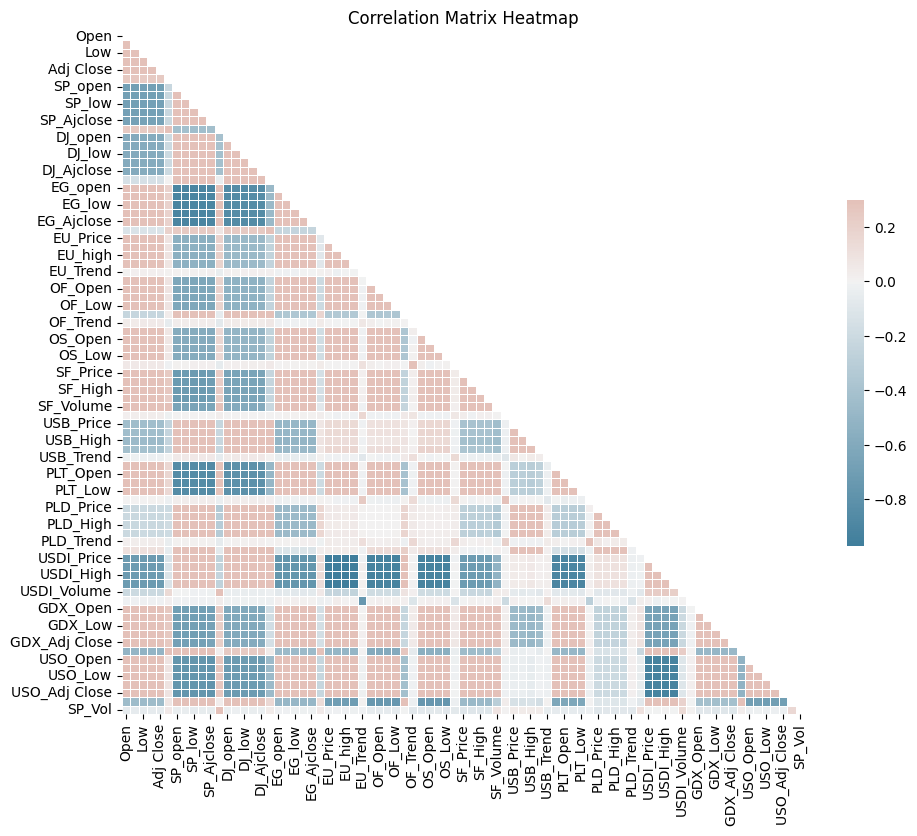

In [8]:
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure with more modern aesthetics
plt.figure(figsize=(11, 9))

# Create a colormap for better visual appeal
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# Add titles and labels as necessary
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SP_Vol
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,0.011162
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,0.010928
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,0.010160
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,0.007279
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,0.007275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,2018-12-03,116.599998,116.769997,116.300003,116.410004,116.410004,8469500,280.279999,280.399994,277.510010,...,19.440001,19.337685,47882800,11.270000,11.270000,11.020000,11.270000,11.270000,32582300,0.012793
1700,2018-12-04,117.370003,117.389999,116.930000,117.120003,117.120003,7186100,278.369995,278.850006,269.899994,...,19.600000,19.496843,45434300,11.250000,11.350000,11.150000,11.180000,11.180000,27194400,0.019711
1701,2018-12-06,117.379997,117.690002,116.919998,117.139999,117.139999,9267600,265.920013,269.970001,262.440002,...,19.709999,19.606262,50911100,10.860000,11.000000,10.600000,10.940000,10.940000,45909400,0.020044
1702,2018-12-07,117.620003,118.230003,117.540001,118.089996,118.089996,10402900,269.459991,271.220001,262.630005,...,20.200001,20.093685,67727400,11.370000,11.480000,11.080000,11.110000,11.110000,43287600,0.019422


In [11]:
X = df.drop(['Date', 'SP_Vol'], axis=1)
y = df['SP_Vol']

X.shape, y.shape

((1704, 80), (1704,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1363, 80), (341, 80), (1363,), (341,))

In [13]:
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [14]:
lgbm_estimator = LGBMRegressor()
rfe = RFE(lgbm_estimator, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

X_train_selected.shape, X_test_selected.shape

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18228
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 80
[LightGBM] [Info] Start training from score 0.007377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17973
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 79
[LightGBM] [Info] Start training from score 0.007377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17718
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 78
[LightGBM] [Info] Start tra

((1363, 15), (341, 15))

In [76]:
def create_sequences(X, y, sequence_length):
    Xs, ys = [], []
    for i in range(len(X) - sequence_length):
        Xs.append(X[i:(i + sequence_length), :])
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)


In [77]:
X_test_selected[0:24, :].shape

(24, 15)

In [78]:
y_test

1363    0.006531
1364    0.006532
1365    0.006552
1366    0.007206
1367    0.007244
          ...   
1699    0.012793
1700    0.019711
1701    0.020044
1702    0.019422
1703    0.019677
Name: SP_Vol, Length: 341, dtype: float64

In [79]:
sequence_length = 24

X_train_seq, y_train_seq = create_sequences(X_train_selected, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_selected, y_test, sequence_length)

X_train_seq.shape, y_train_seq.shape, X_test_seq.shape, y_test_seq.shape

((1339, 24, 15), (1339,), (317, 24, 15), (317,))

In [80]:
y_test_seq[0:16]

array([0.00653124, 0.00653196, 0.00655235, 0.0072062 , 0.00724365,
       0.007249  , 0.00726489, 0.00722938, 0.00723585, 0.00737997,
       0.0063685 , 0.00636822, 0.00618883, 0.00624608, 0.00432584,
       0.00430861])

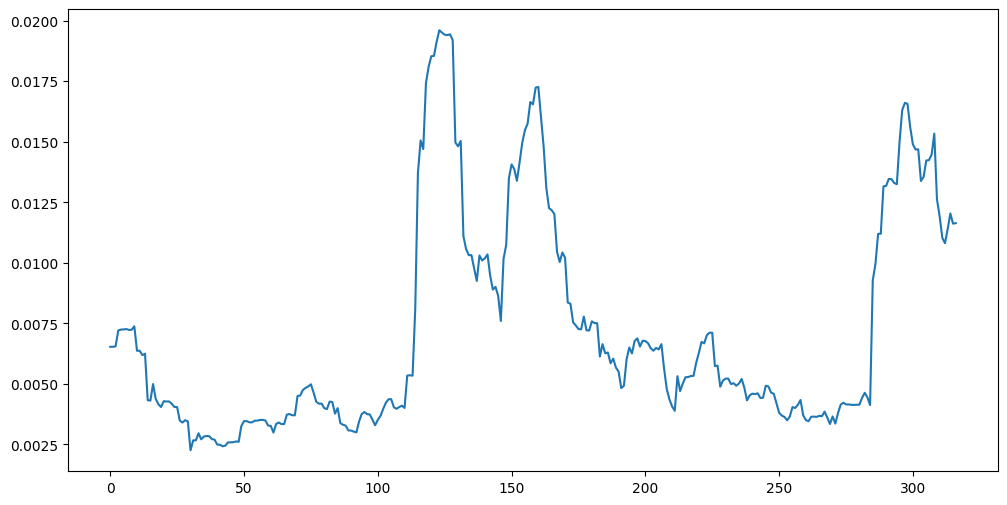

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq)
plt.show()


In [82]:
X_train_tensor = torch.tensor(X_train_seq).float()
y_train_tensor = torch.tensor(y_train_seq).float()
X_test_tensor = torch.tensor(X_test_seq).float()
y_test_tensor = torch.tensor(y_test_seq).float()

X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([1339, 24, 15]),
 torch.Size([1339]),
 torch.Size([317, 24, 15]),
 torch.Size([317]))

In [83]:
batch_size = 16

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_loader.dataset[0][0].shape

torch.Size([24, 15])

In [84]:
for _, y in test_loader:
    print(y[0].item())
    break

0.0065312376245856285


In [85]:
class UniGRUModel(nn.Module):
    def __init__(self, input_size):
        super(UniGRUModel, self).__init__()
        self.gru1 = nn.GRU(input_size=input_size, hidden_size=64, batch_first=True)
        self.gru2 = nn.GRU(input_size=64, hidden_size=32, batch_first=True)
        self.gru3 = nn.GRU(input_size=32, hidden_size=16, batch_first=True)
        self.fc = nn.Linear(in_features=16, out_features=1)

    def forward(self, x):
        #print("Input size:", x.shape)
        x, _ = self.gru1(x)
        x, _ = self.gru2(x)
        x, _ = self.gru3(x)
        # Select the output of the last time step
        #print("after 3rd lstm:", x.shape)
        x = x[:, -1, :]
        x = self.fc(x)
        x = torch.relu(x)
        #print("after fc:", x.shape)
        return x

In [86]:
input_size = train_loader.dataset[0][0].shape[1].__int__()
input_size

15

In [91]:
model_uni_gru = UniGRUModel(input_size=input_size)

torch.seed = 42
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_uni_gru.parameters(), lr=0.001)

epochs = 100
patience = 14
best_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    running_loss = 0.0
    model_uni_gru.train()  # Set the model to training mode

    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model_uni_gru(inputs)  # Forward pass
        outputs = outputs.squeeze()  # Remove the dimension of 1
        #print("outputs:", outputs)
        loss = loss_fn(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the weights

        running_loss += loss.item()

    # Validation loss for early stopping
    model_uni_gru.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_loss = sum(loss_fn(model_uni_gru(X).squeeze(), y).item() for X, y in test_loader)
        #for inputs, labels in test_loader:
        #    outputs = model_uni_gru(inputs)
        #    outputs = outputs.squeeze()
        #    print("outputs:", outputs)
        #   val_loss = loss_fn(outputs, labels)

    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience and epoch > 20:
            print("Early stopping triggered")
            break

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Val Loss: {val_loss / len(test_loader)}")

Epoch 1, Loss: 0.0002824918027959895, Val Loss: 0.000198768779182501
Epoch 2, Loss: 0.00011094499084306011, Val Loss: 0.00034322528881034484
Epoch 3, Loss: 4.796495246292157e-05, Val Loss: 0.00045513876800669096
Epoch 4, Loss: 5.410377101795694e-05, Val Loss: 0.0006136363339464878
Epoch 5, Loss: 5.873656029244839e-05, Val Loss: 0.0007866101577747031
Epoch 6, Loss: 7.055245380830197e-05, Val Loss: 0.0009740279499965254
Epoch 7, Loss: 8.638348771312854e-05, Val Loss: 0.0010315653951693093
Epoch 8, Loss: 0.0001185590540295661, Val Loss: 0.0007183960722613846
Epoch 9, Loss: 0.000139817230034856, Val Loss: 0.0002921580261727286
Epoch 10, Loss: 0.00013847053979193768, Val Loss: 0.00014869367067262828
Epoch 11, Loss: 0.00011751187295738235, Val Loss: 0.00011341049699922223
Epoch 12, Loss: 0.00010146354111046072, Val Loss: 0.00011321226069469504
Epoch 13, Loss: 7.096210741440787e-05, Val Loss: 0.00031435248647539995
Epoch 14, Loss: 6.0201243804448e-05, Val Loss: 0.00028457157524712783
Epoch 15

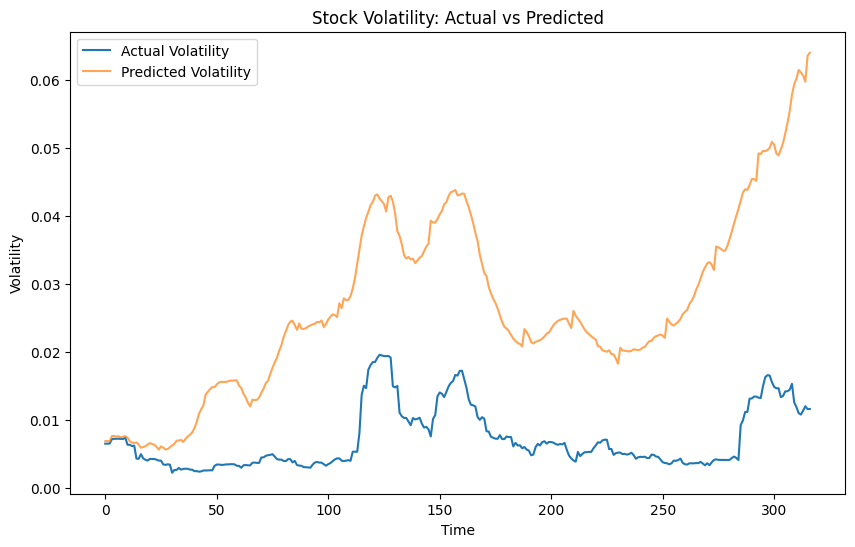

In [92]:
model_uni_gru.eval()  # Set the model to evaluation mode

actuals = []
predictions = []

with torch.no_grad():
    for X, y in test_loader:
        # Get the model output
        output = model_uni_gru(X).squeeze()

        # Store predictions and actual values
        predictions.extend(output.numpy())
        actuals.extend(y.numpy())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Volatility')
plt.plot(predictions, label='Predicted Volatility', alpha=0.7)
plt.title('Stock Volatility: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()